In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
file = '/content/Titanic-Dataset.csv'
data = pd.read_csv(file)
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 891
Number of columns: 12


In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_data_cleaned = data.drop(columns=['Cabin'])

median_age = titanic_data_cleaned['Age'].dropna().median()
titanic_data_cleaned['Age'] = titanic_data_cleaned['Age'].fillna(median_age)

most_frequent_embarked = titanic_data_cleaned['Embarked'].mode()[0]
titanic_data_cleaned['Embarked'] = titanic_data_cleaned['Embarked'].fillna(most_frequent_embarked)

In [ ]:
print(titanic_data_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

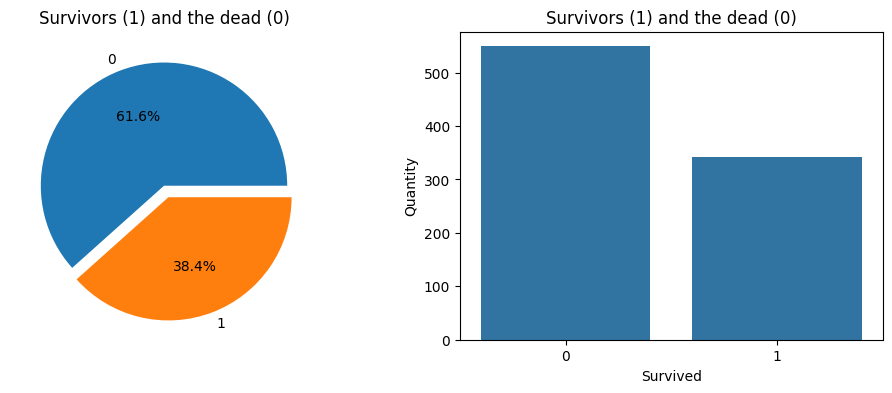

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

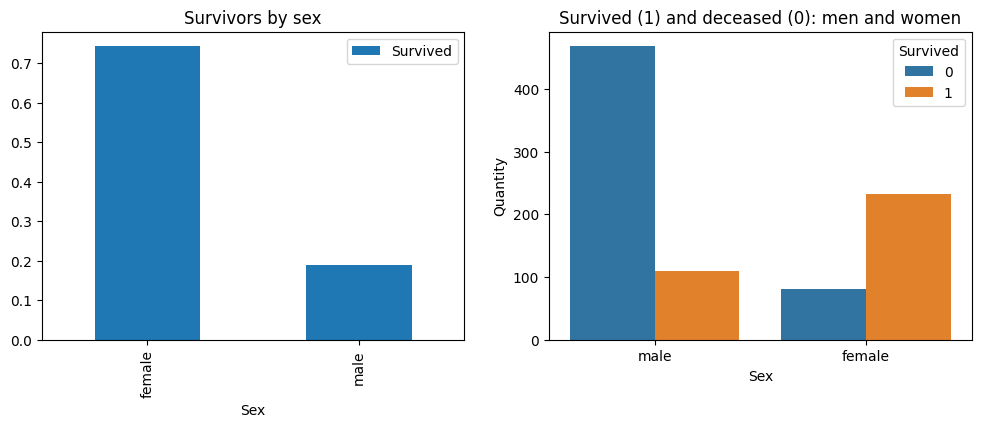

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue='Survived', data= data, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
label_encoder = LabelEncoder()
titanic_data_cleaned['Sex'] = label_encoder.fit_transform(data['Sex'])
titanic_data_cleaned = pd.get_dummies(titanic_data_cleaned, columns=['Embarked'], drop_first=True)

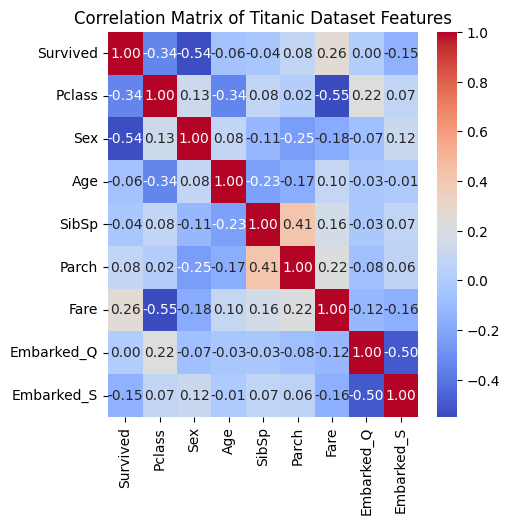

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_data = titanic_data_cleaned.drop(columns=['Name', 'Ticket', 'PassengerId'])  # Remove 'Name', 'Ticket' and 'PassengerId' columns

# Now calculate the correlation matrix
plt.figure(figsize=(5, 5))
correlation_matrix = numeric_data.corr()  # Use the modified DataFrame
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()

In [ ]:
# Select relevant features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target='Survived'

In [ ]:
X = titanic_data_cleaned[features]
y = titanic_data_cleaned[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test,y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test,y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test,y_pred_dt))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7877094972067039


<ipython-input-127-b5a8c194c87c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


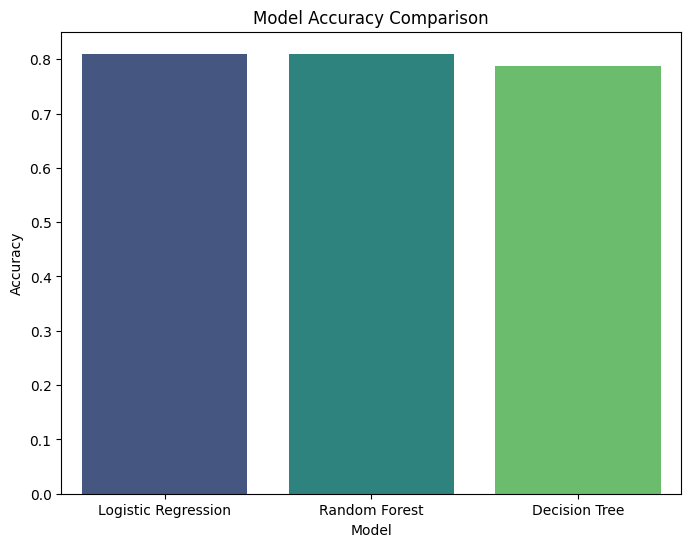

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_log),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_dt)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
ids = test['PassengerId']

# Assuming 'rf_clf' is your trained RandomForestClassifier
predictions = rf_clf.predict(test[features]) # Use 'features' from your previous code

# set the output as a dataframe and convert
# to csv file named resultfile.csv
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
df=pd.read_csv('/content/resultfile.csv')

In [ ]:
df.head()

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
